<a href="https://colab.research.google.com/github/vivianusdjpy/Supervised-Learning-with-Various-Regression-Techniques/blob/master/Supervised_Learning_using_various_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION TECHNIQUES:
# Predicting the Price of a House.

## 1. Defining the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### a) Specifying the Question


Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.



### b) Defining the Metric for Success
This project will be successful when:
1)We accurately predict the winning team based on the two factors:

       a)Home team or away team

       b)The type of tournament 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context 
The Coca-Cola ranking system was designed by FIFA and named 'SUM'.
This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score.
The lowest score which may be negative indicates the worst team while the highest score indicated the best team.

### d)Experimental Design
The project was undertaken using the following design
Datasets(Independent Project Week 7 - house_data.csv)

Performing EDA

Feature Engineering

Multiple Linear Regression

Quantile regression

Ridge Regression

Lasso Regression

Elastic-Net Regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Reading the Data

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#loading the dataset
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#obtaining information about the dataset
data.info()
#the data has 20 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [5]:
#describing the data using measures of central tendency(mean,mode and median) and measures
#of dispersion(standard deviation, variance)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Univariate Analysis

#Price column
This is the dependent variable which we are trying to predict.

In [6]:
#describing the price column in the dataset using measures of central tendency and measures of dispersion
data['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#Bedrooms
This column indicates the number of bedrooms in the house

In [7]:
data.bedrooms.nunique()
#There are 13 unique vales for the number of bedrooms in the house
data.bedrooms.unique()
#The unique values are
[ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33]
#data.bedrooms.value_counts()

[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]

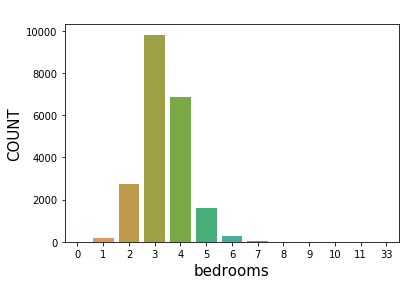

In [8]:
#visualizing the distribution of bedrooms in the dataset
sb.countplot('bedrooms',data = data)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bedrooms",fontsize=16,color="white")
plt.show()
#The distribution is normal

Text(0.5, 1.0, 'Boxplot of Bedrooms')

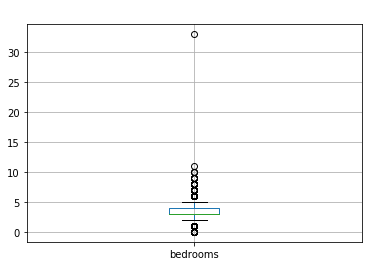

In [9]:
#checking for outliers
data.boxplot(column=['bedrooms'])
plt.title("Boxplot of Bedrooms",fontsize=16,color="white")
#there are a few outliers

In [0]:
#dropping the outlier
#creating a copy
data1 = data
data1.drop(data1.index[data1['bedrooms'] == 33], inplace = True)

In [11]:
#one values has been dropped
data1.shape

(21612, 20)

#Bathrooms Column
This column gives the number of bathrooms in the house

In [12]:
data1.bathrooms.nunique()
#there are 30 unique values
data1.bathrooms.describe()

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

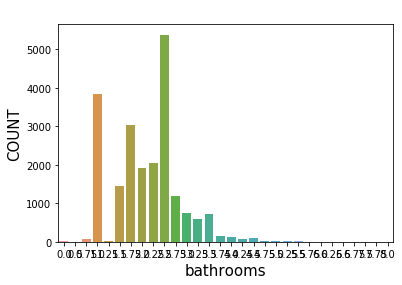

In [13]:
#visualizing the distribution of bathrooms in the dataset
sb.countplot('bathrooms',data = data1)
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bathrooms",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

Text(0.5, 1.0, 'Boxplot of Bathrooms')

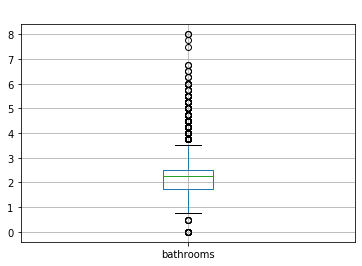

In [14]:
#checking the bathrooms column distribution using a boxplot
data1.boxplot(column=['bathrooms'])
plt.title("Boxplot of Bathrooms",fontsize=16,color="white")

#View Column
The view column shows the number of views that the house has and the value ranges from 0 to 4

In [15]:
#There are 5 unique values for the view column
data1.view.unique()

array([0, 3, 4, 2, 1])

In [16]:
#counting the number of values in the view column.
data1['view'].value_counts()

0    19488
2      963
3      510
1      332
4      319
Name: view, dtype: int64

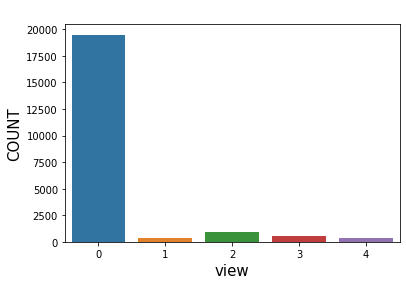

In [17]:
sb.countplot('view',data = data1)
plt.xlabel("view",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of VIEW",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

#### 90.2 percent of the data in the view column consists of zeros. This column  does not provide alot of information thus we drop it.

In [0]:
#creating a copy
data2 = data1

In [19]:
#Dropping the view column
data2.drop('view', axis=1, inplace=True)
data2.shape


(21612, 19)

###View column dropped!

# Waterfront column
Boolean

In [20]:
#The waterfront column is boolean.
# 0 indicates no waterfront while 1 indicates presence of a waterfront
#
data2.waterfront.unique()

array([0, 1])

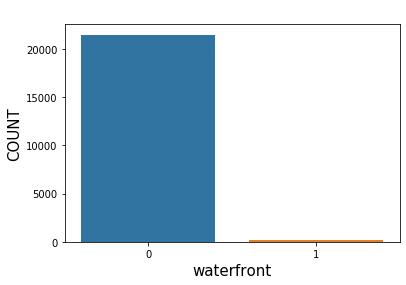

In [21]:
sb.countplot('waterfront',data = data2)
plt.xlabel("waterfront",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of WaterFront",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

### Most of the houses do not have a Waterfront.

#Condition
Ordinal column that ranks the condition of a house from 1 to 5. 1 is a low ranking while 5 is the highest ranking.

In [22]:
data2.condition.unique()
#The condition values from 1 to 5

array([3, 5, 4, 1, 2])

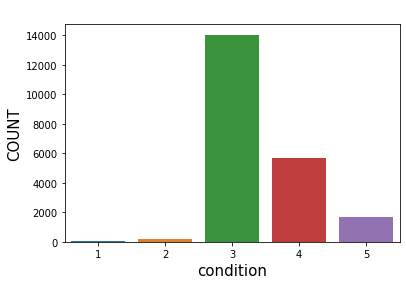

In [23]:
#visualizing the distribution of the condition of houses
sb.countplot('condition',data = data1)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Condition",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

####Most of the houses have an above average condition.

#Grade

In [24]:
data2.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

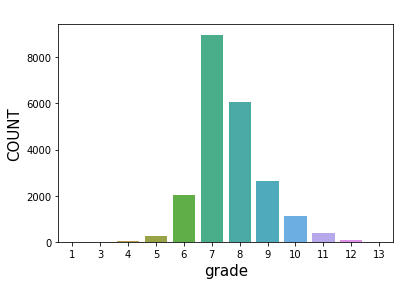

In [25]:
#visualizing the distribution of the condition of houses
sb.countplot('grade',data = data2)
plt.xlabel("grade",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Grade",fontsize=16,color="white")
plt.show()
#The Grade with the highest count is 7 followed by 8.

#Yr_built

In [26]:
data2.yr_built.unique()
#the data is for houses built between 1935 and 1955

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

#Yr_renovated

In [27]:
data2.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

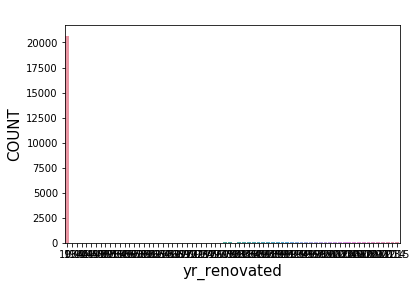

In [28]:
#visualizing the distribution of the condition of houses
sb.countplot('yr_renovated',data = data2)
plt.xlabel("yr_renovated",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of yr_renovated",fontsize=16,color="white")
plt.show()


In [0]:
#creating a copy
data3 = data2

In [30]:
#Dropping the yr_renovated column
data3.drop('yr_renovated', axis=1, inplace=True)
data3.shape

(21612, 18)

95% Percent of the column has zeros. The column does not provide alot of information thus we drop it.

##zipcode

##Lat ,	long

In [31]:
#Dropping the sqft_living15	and sqft_lot15 column
#creating a copy
data4 = data3
data4.drop(columns=['sqft_living15','sqft_lot15'], axis=1, inplace=True)
data4.shape


(21612, 16)

# 7.Bivariate Analysis

In [32]:
data4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,98103,47.6993,-122.346
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,47.5107,-122.362
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,47.5944,-122.299
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,47.5345,-122.069


## Checking for Multi-collinearity

In [33]:
# Let's display the correlations between the variables
corr = data4[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',	'waterfront',	'condition','grade','sqft_above','sqft_basement','yr_built',]].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built
price,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.036366,0.667476,0.605589,0.323833,0.053993
bedrooms,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.309490,0.159167
bathrooms,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.283789,0.506012
sqft_living,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.435065,0.318037
sqft_lot,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.015293,0.053073
floors,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,-0.245684,0.489302
waterfront,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,0.080591,-0.026165
condition,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,0.174057,-0.361380
grade,0.667476,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.168412,0.446952
sqft_above,0.605589,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,-0.051918,0.423879


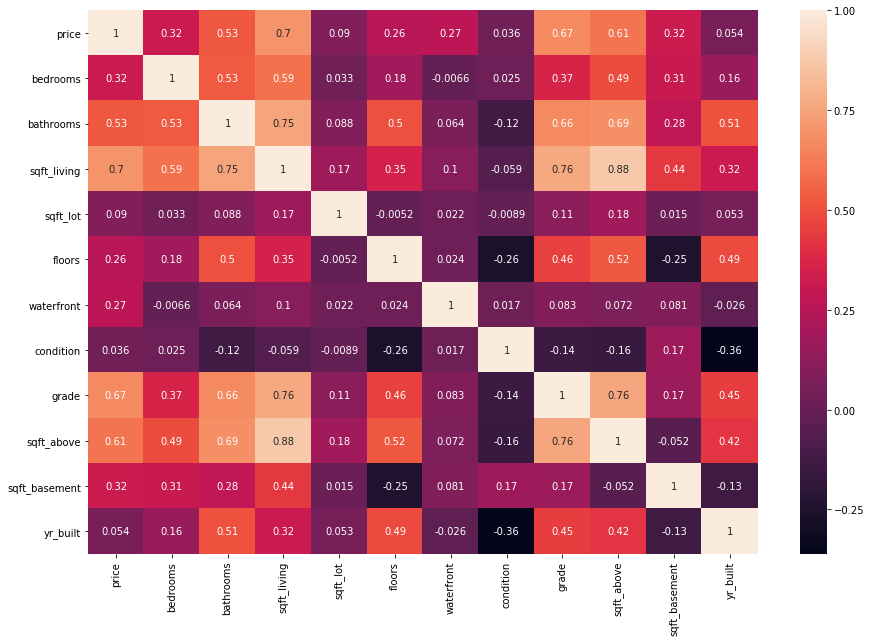

In [34]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

##### The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

# Feature Engineering
The columns sqft_above and sqft_living have a very high correlation of 0.88 thus we join the two to form a new column sqft_abv_living

In [35]:
#creating a copy
data5 = data4

data5['sqft_abv_living'] = data5['sqft_above'] + data5['sqft_living']
data5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_abv_living
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,47.5112,-122.257,2360
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,47.7210,-122.319,4740
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,47.7379,-122.233,1540
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,47.5208,-122.393,3010
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,47.6168,-122.045,3360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,98103,47.6993,-122.346,3060
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,47.5107,-122.362,4620
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,47.5944,-122.299,2040
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,47.5345,-122.069,3200


In [36]:
#creating a copy
data6 = data5.drop(columns= ['id','sqft_above','sqft_living','long','lat'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 12 columns):
price              21612 non-null float64
bedrooms           21612 non-null int64
bathrooms          21612 non-null float64
sqft_lot           21612 non-null int64
floors             21612 non-null float64
waterfront         21612 non-null int64
condition          21612 non-null int64
grade              21612 non-null int64
sqft_basement      21612 non-null int64
yr_built           21612 non-null int64
zipcode            21612 non-null int64
sqft_abv_living    21612 non-null int64
dtypes: float64(3), int64(9)
memory usage: 2.8 MB


In [37]:
#obtaining the column names
for col in data6.columns: 
    print(col) 

price
bedrooms
bathrooms
sqft_lot
floors
waterfront
condition
grade
sqft_basement
yr_built
zipcode
sqft_abv_living


In [71]:
X = data6.drop(columns= ['price'])
y = data6['price']

data7 = pd.get_dummies(data6, columns=['waterfront'])
print(X)
print(y)

       bedrooms  bathrooms  sqft_lot  ...  yr_built  zipcode  sqft_abv_living
0             3       1.00      5650  ...      1955    98178             2360
1             3       2.25      7242  ...      1951    98125             4740
2             2       1.00     10000  ...      1933    98028             1540
3             4       3.00      5000  ...      1965    98136             3010
4             3       2.00      8080  ...      1987    98074             3360
...         ...        ...       ...  ...       ...      ...              ...
21608         3       2.50      1131  ...      2009    98103             3060
21609         4       2.50      5813  ...      2014    98146             4620
21610         2       0.75      1350  ...      2009    98144             2040
21611         3       2.50      2388  ...      2004    98027             3200
21612         2       0.75      1076  ...      2008    98144             2040

[21612 rows x 11 columns]
0        221900.0
1        538000.0
2

#Multi-Variate Analysis

In [39]:

from sklearn.decomposition import PCA

np.random.seed(0)

train_features = X

model = PCA(n_components=11).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','grade','sqft_basement','yr_built','zipcode','sqft_abv_living']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,sqft_lot
1,PC1,sqft_abv_living
2,PC2,sqft_basement
3,PC3,zipcode
4,PC4,yr_built
5,PC5,bedrooms
6,PC6,grade
7,PC7,condition
8,PC8,bathrooms
9,PC9,floors


#####The dataframe above gives an ordered list of how the principal components explain the variance starting from the highest to the lowest. PC0 explains the most variance while PC10 explains the least Variance.

# Regression


#1st Approach: Multiple Linear Regression

In [0]:
from sklearn.model_selection import train_test_split
#Splitting the data into train and test
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.5, random_state=1)

In [41]:
from sklearn import linear_model
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the
#sole purpose of comparing the linear regression model to the polynomial regression model)

regressor = linear_model.LinearRegression(fit_intercept = True, normalize = True)
regressor.fit(X, y)
# This is our prediction for admission based on our model
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 5746931.780670353
Coefficients: 
 [-4.61760698e+04  4.92374106e+04 -2.29686828e-01  2.56947318e+04
  7.16338573e+05  1.80296459e+04  1.29435746e+05  1.03600926e+02
 -3.79249113e+03  8.73243263e+00  8.79441580e+01]


In [42]:
y_pred = regressor.predict(X) 
 
residuals = y - y_pred

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  218416.72930380714
The residual mean score for the model :  -4.666524227517591e-10


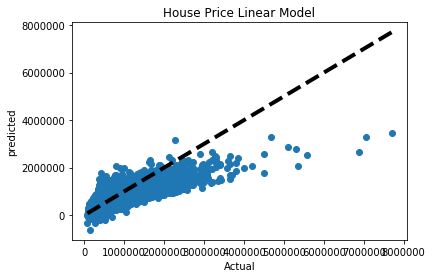

In [43]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('House Price Linear Model')
ax.set_xlabel('Actual')
ax.set_ylabel('predicted')
plt.show()

The RMSE score for the model is quite high hence low predictive capability

## Checking for Heteroskedasticity using Barlette's Test

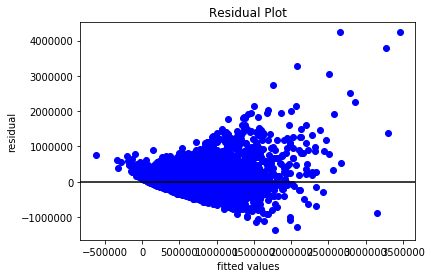

In [44]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

The RMSE score for the model is quite high hence low predictive capability

# 2nd Approach: Quantile Regression

In [72]:
# We take the data into a pandas dataframe so that 
# its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns,
#
data7 = pd.DataFrame(data = np.hstack([X, y]), columns = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','grade','sqft_basement','yr_built','zipcode','sqft_abv_living'])
data7.head()

ValueError: ignored

In [46]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', data6)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3893
Model:                       QuantReg   Bandwidth:                   2.434e+04
Method:                 Least Squares   Sparsity:                    3.389e+05
Date:                Sun, 26 Jan 2020   No. Observations:                21612
Time:                        02:34:59   Df Residuals:                    21600
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -165.2850      1.655    -99.892      0.000    -168.528    -162.042
X[0]       -2.981e+04   1645.886    -18.113      0.000    -3.3e+04   -2.66e+04
X[1]        3.188e+04   2714.986     11.742      0.000    2.66e+04    3.72e+04
X[2]           0.0111      0.029      0.388      0.6

In [49]:
quantiles = np.arange(0.1,1,0.1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['price']] + \
            res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('sqft_lot ~ bedrooms', data6).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['price'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

KeyError: ignored

In [0]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data6 = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [0]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * X
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * X
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * X
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

In [0]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

# 3rd Approach: Ridge Regression

In [0]:
# In order to create our ridge model we need to first determine the most appropriate value for
# the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [51]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was.

48145195961.76173

In [52]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

47715068170.60796


In [55]:
# The 0.35 is lower than the 0.38. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
regression = LinearRegression()
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data6("price").columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

AttributeError: ignored

# 4th Approach: Lasso Regression

In [0]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [57]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, Mean Squared Error, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6465041877274238
lasso MSE: 47705867653.435776
lasso coef: [ -41923.10661272   37919.25696153   -9512.4989136    13873.18903137
   61975.04673991   11730.10020635  152145.32000262   45849.7547808
 -111394.72354203     466.79447516  148792.62176242]


In [58]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

#splitting data into training and test sets, and choose a set of parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6572500481514916
linear score: 0.6572595937302255
lasso MSE: 47622105296.031685
linear MSE: 47620779021.430824
lasso best estimator coef: [-3.96262726e+04  3.44374655e+04 -8.65585905e+03  1.57939227e+04
  6.20683437e+04  1.25628278e+04  1.53711496e+05  4.44829672e+04
 -1.10172892e+05  1.04656953e+00  1.46814331e+05]
linear coef: [-3.96967611e+04  3.44705669e+04 -8.68438118e+03  1.58268712e+04
  6.20813586e+04  1.25848237e+04  1.53714201e+05  4.45069509e+04
 -1.10219032e+05  1.11970897e+01  1.46857910e+05]


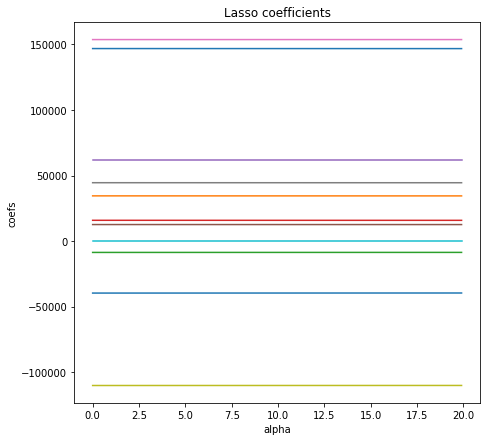

In [63]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 

import numpy as np

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

# 5th Approach: Elastic-Net Regression

In [0]:
from sklearn.linear_model import ElasticNet

In [65]:
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

47705867639.77256


In [67]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
%matplotlib inline 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

AttributeError: ignored

In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [77]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

48204070949.599846

In [78]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

94162799458.3027


In [80]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 27511.888795891005,
 'bedrooms': 12075.983799907943,
 'condition': 5282.787222247209,
 'floors': 17301.38156790608,
 'grade': 26120.484676202534,
 'sqft_abv_living': 17.999055545351847,
 'sqft_basement': 34.623412770570184,
 'sqft_lot': 0.08028790386186677,
 'waterfront': 161700.55125383634,
 'yr_built': -101.83380514829061,
 'zipcode': -6.603673160850493}

ValueError: ignored

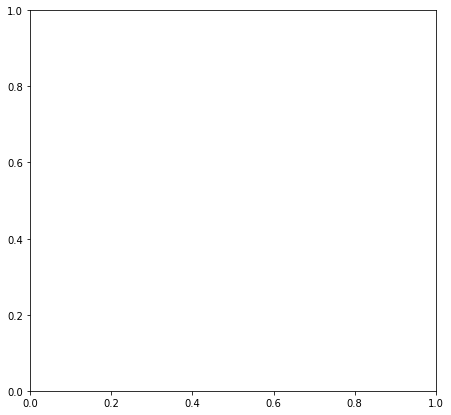

In [84]:
# Building Elastic net coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(elastic.coef_, coef)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

There are no patterns to explain the variances in the data.
The features are independent.

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

### c). Did we have the right question?

YES!
Football is  greatly loved sport and predicting the outcome of a match based on previous outcomes is an interesting challenge.

#Conclusion

Polynomial Regression and Logistic Regression do not yield an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered